In [3]:
import cv2
import numpy as np
import sys
%pylab inline
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import argparse
import imutils



path1=r'1.jpg'
path2=r'2.jpg'
path3=r'3.jpg'
im1=cv2.imread(path1)
im2=cv2.imread(path2)
im3=cv2.imread(path3)

Populating the interactive namespace from numpy and matplotlib


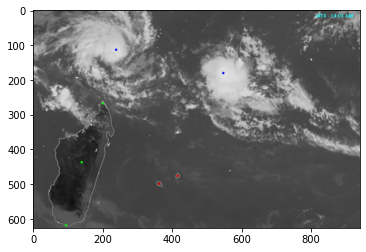

In [4]:
plt.figure()
plt.imshow(im1)
plt.show()

In [5]:
def find_centre(low_bnd,up_bnd,image):
  hsv_img=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  masks=cv2.inRange(hsv_img,low_bnd,up_bnd)
  cnts = cv2.findContours(masks.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  centres=[]
  im_copy=image.copy()
  for c in cnts:
    M=cv2.moments(c)
    cx=int(M["m10"] / M["m00"])
    cy=int(M["m01"] / M["m00"])
    centres.append([cx,cy])
  return centres

### To find the centres of the islands:

In [6]:
blue_centres=find_centre(np.array([119,100,100]),np.array([121,255,255]),im1)
print('centres of the cyclones')
print('Reunion')
print(blue_centres[0])
print('Mauritius')
print(blue_centres[1])

centres of the cyclones
Reunion
[362, 498]
Mauritius
[415, 475]


### To find the centres of the places given:

In [7]:
green_centres=find_centre(np.array([58,30,30]),np.array([62,255,255]),im1)
print('co-ordinates of the Antsiranana =' )
print(green_centres[2])
print('co-ordinates of the capital city of Antananarivo' )
print(green_centres[1])
print('co-ordinates of the Benonoka' )
print(green_centres[0])

co-ordinates of the Antsiranana =
[200, 267]
co-ordinates of the  capital city of Antananarivo
[139, 436]
co-ordinates of the Benonoka
[94, 617]


## **Centres of the cyclones**  (At 14:03AM)

In [8]:
red_centres_1=find_centre(np.array([0,200,200]),np.array([2,255,255]),im1)
print('co-ordinates of the Cyclone Belna =' )
print(red_centres_1[1])
print('co-ordinates of the  Cyclone Ambali ' )
print(red_centres_1[0])



co-ordinates of the Cyclone Belna =
[238, 113]
co-ordinates of the  capital city of Cyclone Ambali 
[546, 180]


## **Centres of the cyclones**  (At 14:44 AM)

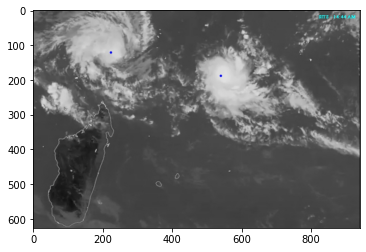

In [9]:
plt.figure()
plt.imshow(im2)
plt.show()

In [10]:
red_centres_2=find_centre(np.array([0,200,200]),np.array([2,255,255]),im2)
print('co-ordinates of the Cyclone Belna =' )
print(red_centres_2[1])
print('co-ordinates of the  Cyclone Ambali ' )
print(red_centres_2[0])

co-ordinates of the Cyclone Belna =
[223, 121]
co-ordinates of the  capital city of Cyclone Ambali 
[539, 188]


## **Centres of the cyclones**  (At 15:39 AM)

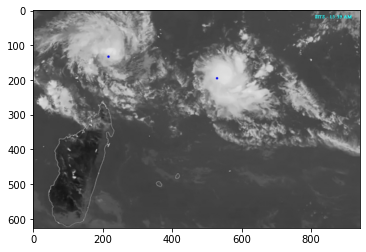

In [11]:
plt.figure()
plt.imshow(im3)
plt.show()

In [12]:
red_centres_3=find_centre(np.array([0,200,200]),np.array([2,255,255]),im3)
print('co-ordinates of the Cyclone Belna =' )
print(red_centres_3[1])
print('co-ordinates of the  Cyclone Ambali ' )
print(red_centres_3[0])

co-ordinates of the Cyclone Belna =
[216, 133]
co-ordinates of the  capital city of Cyclone Ambali 
[528, 195]


  
The equation of the path followed by the cyclone Belna is y + (7/11)x = 531<br>
The equation of the path followed by the Cyclone Ambali is y + (12/7)x = 503.29<br>
 The intersection of this lines is **(-25.71,547.36)**<br>
distance between Antsiranana and Benonoka = 350pixels = 1500kms(in y direction  or vertical direction)<br>
distance between Reunion and Mauritius is = 53 pixels =250 kms(in x direction or horizontal direction)<br>

|Time stamp |Belna        |Ambali |
|---|-----|----|
|14:02 AM   |(238, 113)    |(546, 180)|
|14:44 AM   |(223, 121)    |(539, 188)|
|15:39 AM   |(216,133)    |(528,195)|

### **Veloctiy(pixels/min):**<br>
Velocity of the Cyclone Belna = ($\frac{-7}{55}$,$\frac{12}{55}$)<br>
Velocity of the Cyclone Ambali = ($\frac{-1}{5}$,$\frac{7}{55}$)<br>


## **Scaling:**

In horizontal direction (kms/pixels) = 4.2857<br>
In Vertical direction (kms/pixels) = 4.71698 <br>

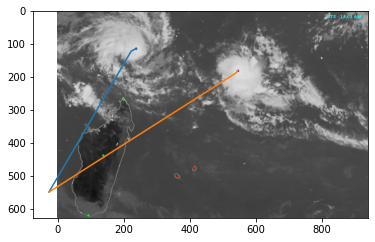

In [13]:
plt.figure()
plt.imshow(im1)
plt.plot([238,223,216,-25.71],[113,121,133,547.36])
plt.plot([546,539,528,-25.71],[180,188,195,547.36])
plt.show()


The distance between the Antananarivo and the point of intersection of trajectories = 198.82 pixels<br>


Initial position of the cyclones Belna and Ambali =(216,133) and	(528,195)<br>
After time **t** minutes the position of the Cyclones Belna =(216+$\frac{-7t}{55}$,133+$\frac{12t}{55}$)<br>
After time **t** minutes the position of the Cyclones Ambali =(528+$\frac{-t}{5}$,195+$\frac{7t}{55}$)<br>
For Cyclone Belna:<br>
(-25.71,547.36) =(216+$\frac{-7t}{55}$,133+$\frac{12t}{55}$)<br>
By solving for t, we get t1=1899.15 minutes
For Cyclone Ambali:<br>
(-25.71,547.36) =(528+$\frac{-t}{5}$,195+$\frac{7t}{55}$)<br>
By solving for t, we get t2=2768.55 minutes<br>
**As the t1 and t2 are not equal thn both the cyclones will not be colliding in reality**.<br>